In [1]:
#Importing Necessary Libraries
import pandas as pd 
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [2]:
#Reading data from CSV
car_pricing_df = pd.read_csv("./car-pricing-data.csv")

In [3]:
#Showing the first 10 rows
car_pricing_df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [4]:
#Showing the Last 10 rows
car_pricing_df.tail(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
8118,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8119,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,5.0
8120,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,5.0
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [5]:
#Showing the names of the Features in the dataset
car_pricing_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [6]:
#Showing that how many rows and columns in the dataset 
car_pricing_df.shape

#We have 12 columns(Features) and 8128 rows(instances)

(8128, 12)

In [7]:
#Showing which Columns has numerical data features for 5 rows
numeric_columns = car_pricing_df._get_numeric_data().columns
numeric_columns
car_pricing_df[numeric_columns].head()

,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0


In [8]:
#Showing which Columns has categorical features for 5 rows
filt = set(car_pricing_df.columns) - set(numeric_columns)
car_pricing_df[filt].head()

,max_power,mileage,seller_type,owner,fuel,transmission,name,engine
0,74 bhp,23.4 kmpl,Individual,First Owner,Diesel,Manual,Maruti Swift Dzire VDI,1248 CC
1,103.52 bhp,21.14 kmpl,Individual,Second Owner,Diesel,Manual,Skoda Rapid 1.5 TDI Ambition,1498 CC
2,78 bhp,17.7 kmpl,Individual,Third Owner,Petrol,Manual,Honda City 2017-2020 EXi,1497 CC
3,90 bhp,23.0 kmpl,Individual,First Owner,Diesel,Manual,Hyundai i20 Sportz Diesel,1396 CC
4,88.2 bhp,16.1 kmpl,Individual,First Owner,Petrol,Manual,Maruti Swift VXI BSIII,1298 CC


In [9]:
#Descriptive statistics about numerical features
car_pricing_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
#Descriptive statistics about categorical features
car_pricing_df.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power
count,8128,8128,8128,8128,8128,7907,7907,7913
unique,2058,4,3,2,5,393,121,322
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp
freq,129,4402,6766,7078,5289,225,1017,377


In [11]:
#Summary of the dataframe
car_pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [12]:
#Looking for any missing information in rows
car_pricing_df.isnull()
car_pricing_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [13]:
#Dropping the rows with missing information
car_pricing_df.dropna(inplace = True)
#True means we set the change on our dataframe
#Then we checked again 
car_pricing_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [14]:

filte = car_pricing_df['max_power'] == ' bhp'
car_pricing_df[filte]
#As we can see there is also some rows containing non-informative features

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,bhp,8.0


In [15]:
#Check the above situation for other categorical features
filte = car_pricing_df['engine'] == ' CC'
car_pricing_df[filte]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats


In [16]:
#Continue on checking
filte1 = car_pricing_df['mileage'] == ' kmpl'
car_pricing_df[filte1]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats


In [17]:
#Mileage also has unit of km/kg so i also checked for this unit 
filte2 = car_pricing_df['mileage'] == ' km/kg'
car_pricing_df[filte2]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats


In [18]:
#After checking all features we need to drop 4933th row, because we will transform
#these categorical features to numerical feature by eliminating their units and convert numerical string to integer.
filte = car_pricing_df['max_power'] == ' bhp'
car_pricing_df = car_pricing_df.drop(car_pricing_df[filte].index.values)


In [19]:
#We also checked by looking first 15 rows for dropna command.
#In the csv file 15th(13th in this shown due to 1st index difference and feature names in csv file) row has missing information
car_pricing_df.head(15)
#and we see that the row with missing information is dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [20]:
#We have seen that in mileage there are different units(kmpl and km/kg)

#NOTE:LPG and CNG are gas type of fuels(Although LPG is kept in liquid format, when the pressure on LPG is removed it turns into gas and volume becomes x250) and
#their mileage unit is km/kg. Liter and m^3 are both measures of volume, when we look at pv = nrt formula, volume for the gases are depend on temperature and pressure.
#Mass is always constant for gases, therefore LPG and CNG unit is km/kg
#So when we look at the situation transformation between kmpl and km/kg is uncertain(There are factors like temperature,pressure, density of gas e.t.c)
#When i consult you about this situation, you gave me advise that i should consider them as same unit

#Therefore, in the next block i will eliminate the units and consider mileage values have same unit


In [21]:
#I need to convert categorical features that contains numerical value and unit to numerical
#In order to do that i need to eliminate units from the numerical value

#max_power
car_pricing_df['max_power'] = car_pricing_df['max_power'].str.replace(' bhp','')

#engine
car_pricing_df['engine'] = car_pricing_df['engine'].str.replace(' CC','')

#mileage
car_pricing_df['mileage'] = car_pricing_df['mileage'].str.replace(' kmpl','')
car_pricing_df['mileage'] = car_pricing_df['mileage'].str.replace(' km/kg','')



In [22]:
#Checking the replacement by looking one of the feature
car_pricing_df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 7906, dtype: object

In [23]:
#After eliminating units, i need to convert them to float, int e.t.c from string

#max_power
car_pricing_df['max_power'] = car_pricing_df['max_power'].astype(float)
#car_pricing_df['max_power'] = np.float64(car_pricing_df['max_power'])

#engine
car_pricing_df['engine'] = car_pricing_df['engine'].astype(int)
#car_pricing_df['engine'] = np.int64(car_pricing_df['engine'])# converting int32 to int64

#mileage
car_pricing_df['mileage'] = car_pricing_df['mileage'].astype(float)
#car_pricing_df['mileage'] = np.float64(car_pricing_df['mileage'])

In [24]:
#Checking that if types are changed correctly
car_pricing_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   int32  
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 772.1+ KB


In [25]:
#We need to ignore the name feature in our sets, it is not a selective feature in our case
#because there are many unique variants and the most frequent one(shown in block 10) has -0.01126468659574759(small) correlation 
#with dependent feature(selling price)

#Prove

name = pd.get_dummies(car_pricing_df,columns = ['name'])
car_pricing_df['selling_price'].corr(name['name_Maruti Swift Dzire VDI'])

-0.01126468659574759

In [26]:
#Dropping the name feature
car_pricing_df.drop(['name'], axis = 1, inplace = True)
car_pricing_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [27]:
#Also let's convert year to age because age will give us better understanding than a production year

car_pricing_df['year'] = [2020 - i for i in car_pricing_df['year']]

#Also convert column name to Age
car_pricing_df.rename(columns = {'year':'age'}, inplace = True)
car_pricing_df

,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,6,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,14,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,10,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,13,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,7,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,13,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,11,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,7,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [28]:
#I realise that some mileage values is 0.
#In age its normal to be zero because it means car is manufactured in 2020
#However 0 in the mileage act as an outlier and consider as missing information. Because car must consume fuel and fuel consuming need a ratio per km
mileage_filter = car_pricing_df['mileage'] <= 0
car_pricing_df[mileage_filter]

#I checked other features by simply changing the filter and only mileage has 0 values.

,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
644,11,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172,65.00,5.0
785,11,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086,62.00,5.0
1649,12,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5.0
1676,9,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5.0
2137,7,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179,115.00,5.0
2366,10,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086,62.10,5.0
2725,7,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086,62.10,5.0
4527,9,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5.0
5276,12,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5.0
5843,6,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197,103.25,5.0


In [29]:
#Therefore I need to drop the rows with 0 mileage value

car_pricing_df = car_pricing_df[car_pricing_df.mileage != 0]


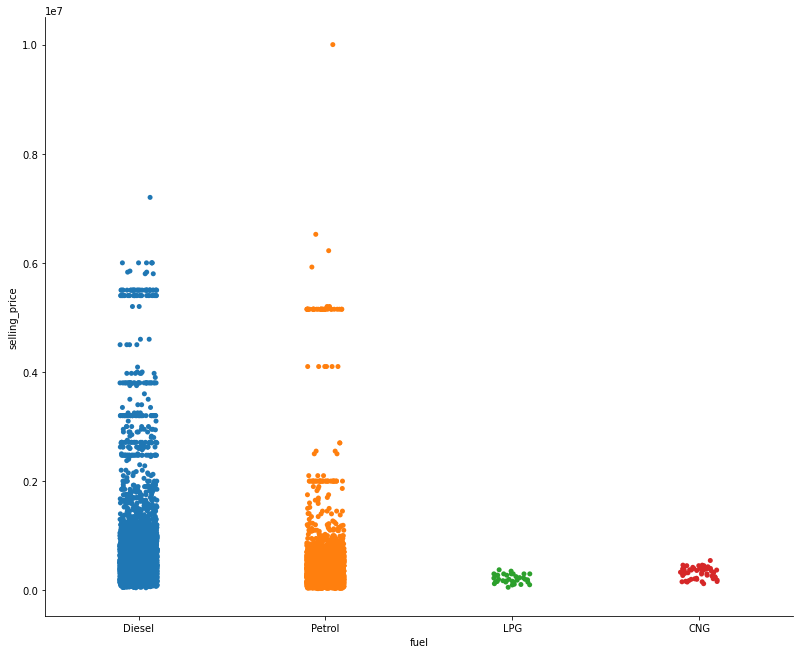

In [30]:
#After we do some process on independent features let's visualize the data for each independent feature with dependent feature
#For the cetegorical ones (before converting them to one-hot dummy format) i wrote a function using seaborn library
# to visualize with dependent feature
def cat_feature_plot(dataframe, x_axis, y_axis):
    sns.catplot(y = y_axis, x = x_axis, data = dataframe, height=9, aspect=11/9)#fitting for owner feature)
    plt.show()

#Visualization on Fuel and selling_price
cat_feature_plot(car_pricing_df,'fuel','selling_price')

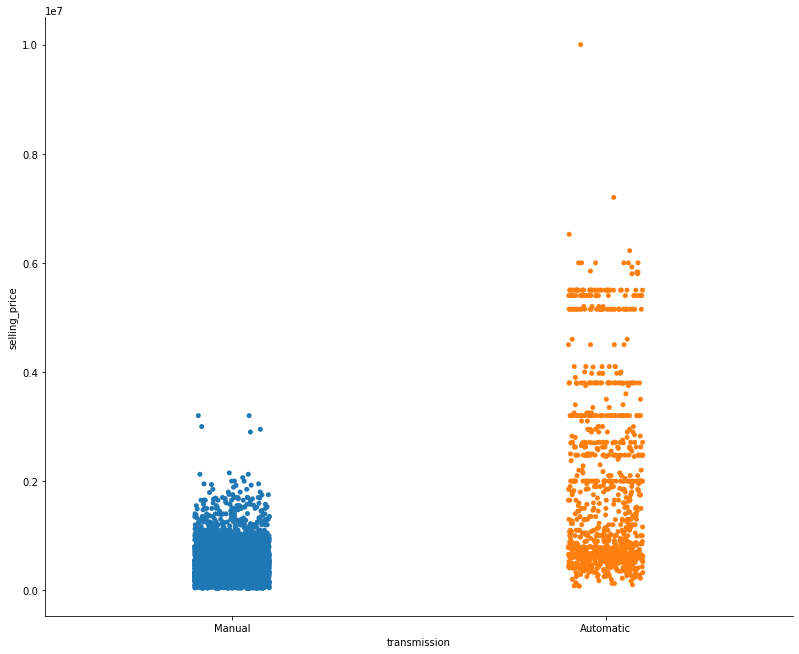

In [31]:

#Visualization on transmission and selling_price
cat_feature_plot(car_pricing_df,'transmission','selling_price')

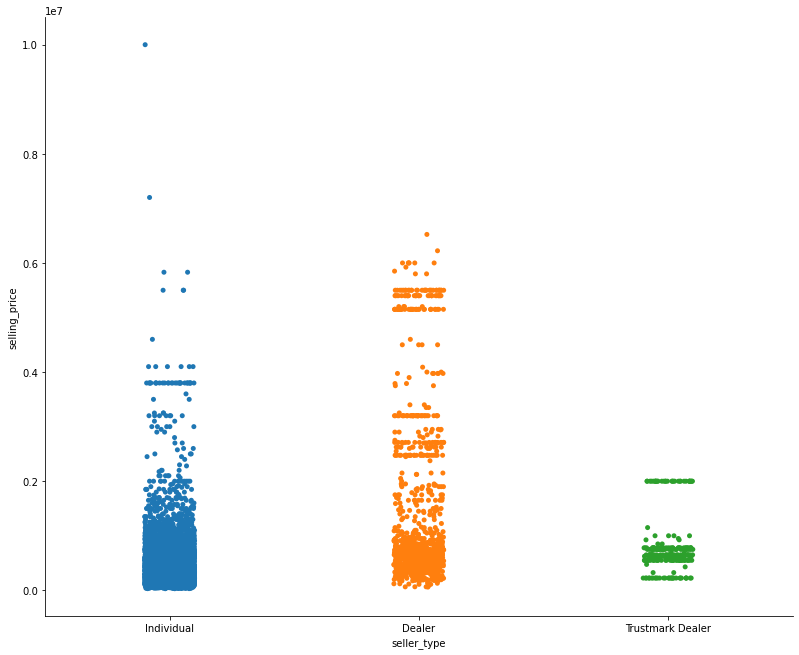

In [32]:
#Visualization on seller_type and selling_price
cat_feature_plot(car_pricing_df,'seller_type','selling_price')

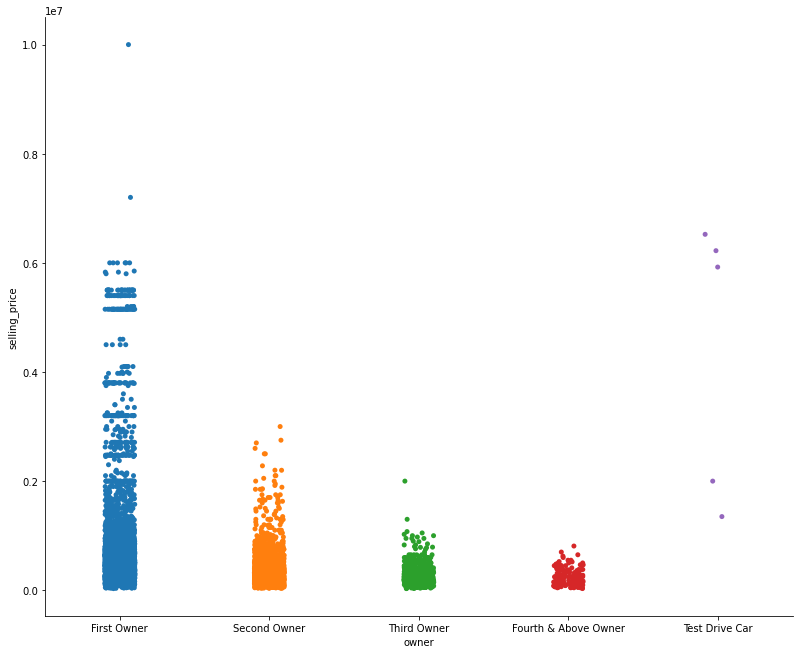

In [33]:
#Visualization on owner and selling_price
cat_feature_plot(car_pricing_df,'owner','selling_price')

In [34]:
#In order to understand the correlation between dependent feature and categorical independent features
#we turn cotegorical features to one-hot dummy format and for generalization we look the correlation with most frequent one-hot dummy(on visualization)
#to decide extract feature or not.
#Note: There maybe small correlation on other one-hot dummies but we cannot simply eliminate one one-hot dummy, we need to eliminate categorical feature itself 

#Fuel
Fuel = pd.get_dummies(car_pricing_df,columns = ['fuel'] )
corr_fuel = float(car_pricing_df['selling_price'].corr(Fuel['fuel_Diesel']))
print(corr_fuel)

car_pricing_df = pd.get_dummies(car_pricing_df,columns = ['fuel'] )
car_pricing_df

0.20366870919526064


,age,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,6,450000,145500,Individual,Manual,First Owner,23.40,1248,74.00,5.0,0,1,0,0
1,6,370000,120000,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,0,1,0,0
2,14,158000,140000,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,0,0,0,1
3,10,225000,127000,Individual,Manual,First Owner,23.00,1396,90.00,5.0,0,1,0,0
4,13,130000,120000,Individual,Manual,First Owner,16.10,1298,88.20,5.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,320000,110000,Individual,Manual,First Owner,18.50,1197,82.85,5.0,0,0,0,1
8124,13,135000,119000,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,0,1,0,0
8125,11,382000,120000,Individual,Manual,First Owner,19.30,1248,73.90,5.0,0,1,0,0
8126,7,290000,25000,Individual,Manual,First Owner,23.57,1396,70.00,5.0,0,1,0,0


In [35]:
#Transmission
transmission = pd.get_dummies(car_pricing_df,columns = ['transmission'] )
corr_transmission = float(car_pricing_df['selling_price'].corr(transmission['transmission_Automatic']))
print(corr_transmission)

#Note: there is negative correlation when transmission is manual and positive correlation when transmission is Automatic 

car_pricing_df = pd.get_dummies(car_pricing_df,columns = ['transmission'] )
car_pricing_df

0.5900105632672865


,age,selling_price,km_driven,seller_type,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
0,6,450000,145500,Individual,First Owner,23.40,1248,74.00,5.0,0,1,0,0,0,1
1,6,370000,120000,Individual,Second Owner,21.14,1498,103.52,5.0,0,1,0,0,0,1
2,14,158000,140000,Individual,Third Owner,17.70,1497,78.00,5.0,0,0,0,1,0,1
3,10,225000,127000,Individual,First Owner,23.00,1396,90.00,5.0,0,1,0,0,0,1
4,13,130000,120000,Individual,First Owner,16.10,1298,88.20,5.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,320000,110000,Individual,First Owner,18.50,1197,82.85,5.0,0,0,0,1,0,1
8124,13,135000,119000,Individual,Fourth & Above Owner,16.80,1493,110.00,5.0,0,1,0,0,0,1
8125,11,382000,120000,Individual,First Owner,19.30,1248,73.90,5.0,0,1,0,0,0,1
8126,7,290000,25000,Individual,First Owner,23.57,1396,70.00,5.0,0,1,0,0,0,1


In [36]:
#Seller type
seller = pd.get_dummies(car_pricing_df,columns = ['seller_type'] )
corr_seller = float(car_pricing_df['selling_price'].corr(seller['seller_type_Dealer']))
print(corr_seller)

#Note: there is negative correlation when seller is Individual and positive correlation when seller is Dealer and Trustmark dealer and

car_pricing_df = pd.get_dummies(car_pricing_df,columns = ['seller_type'] )
car_pricing_df

0.40146516828165235


,age,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,6,450000,145500,First Owner,23.40,1248,74.00,5.0,0,1,0,0,0,1,0,1,0
1,6,370000,120000,Second Owner,21.14,1498,103.52,5.0,0,1,0,0,0,1,0,1,0
2,14,158000,140000,Third Owner,17.70,1497,78.00,5.0,0,0,0,1,0,1,0,1,0
3,10,225000,127000,First Owner,23.00,1396,90.00,5.0,0,1,0,0,0,1,0,1,0
4,13,130000,120000,First Owner,16.10,1298,88.20,5.0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,320000,110000,First Owner,18.50,1197,82.85,5.0,0,0,0,1,0,1,0,1,0
8124,13,135000,119000,Fourth & Above Owner,16.80,1493,110.00,5.0,0,1,0,0,0,1,0,1,0
8125,11,382000,120000,First Owner,19.30,1248,73.90,5.0,0,1,0,0,0,1,0,1,0
8126,7,290000,25000,First Owner,23.57,1396,70.00,5.0,0,1,0,0,0,1,0,1,0


In [37]:
#Owner
owner = pd.get_dummies(car_pricing_df,columns = ['owner'] )
corr_owner = float(car_pricing_df['selling_price'].corr(owner['owner_First Owner']))
print(corr_owner)

#Note: there is positive correlation when owner is first owner and car was test drive car. For others correlation is negative

car_pricing_df = pd.get_dummies(car_pricing_df,columns = ['owner'] )
car_pricing_df

0.24012979797594752


,age,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,6,450000,145500,23.40,1248,74.00,5.0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
1,6,370000,120000,21.14,1498,103.52,5.0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,14,158000,140000,17.70,1497,78.00,5.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,10,225000,127000,23.00,1396,90.00,5.0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,13,130000,120000,16.10,1298,88.20,5.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,320000,110000,18.50,1197,82.85,5.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
8124,13,135000,119000,16.80,1493,110.00,5.0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
8125,11,382000,120000,19.30,1248,73.90,5.0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
8126,7,290000,25000,23.57,1396,70.00,5.0,0,1,0,...,0,1,0,1,0,1,0,0,0,0


In [38]:
#After done with the categorical features we analyze the correlation and visualize
#with numerical features with dependent feature
#For utility i write a function that using scatter approach for plotting 
def num_feature_plot(dataframe, x_axis, y_axis, title):
    x = dataframe[x_axis]
    y = dataframe[y_axis]
    
    plt.scatter(x, y) 
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

def num_feature_plot_w_line(dataframe, x_axis, y_axis, title):
    sns.regplot(x = x_axis,y= y_axis, data = dataframe, ci = None)
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()
    

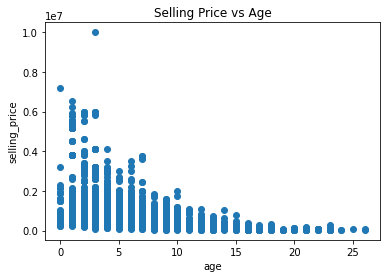

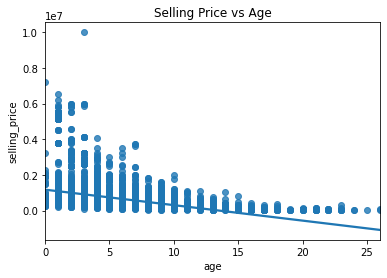

Age and Selling Price Correlation:  -0.41242929151478336


In [39]:
#Visualization on Age and selling_price
num_feature_plot(car_pricing_df,'age','selling_price','Selling Price vs Age')
num_feature_plot_w_line(car_pricing_df,'age','selling_price','Selling Price vs Age')
#Correlation
#Note: From the plot we can understand the type correlation (positive or negative) by looking at the slope on the direction of growth
#and from the distribution of points we can guess that correlatin is high or low. But to make it simple i also plot the graph best fitting line
#However, for certanity and get the exact value  ve use pandas .corr()
print("Age and Selling Price Correlation: ",car_pricing_df['selling_price'].corr(car_pricing_df['age']))



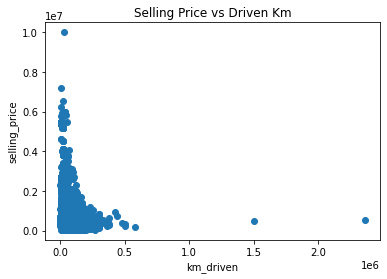

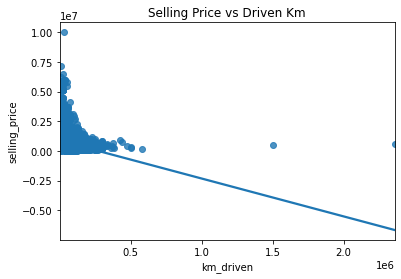

Driven KM and Selling Price Correlation:  -0.2226958428227933


In [40]:
#Visualization on driven km and selling_price
num_feature_plot(car_pricing_df,'km_driven','selling_price','Selling Price vs Driven Km')
num_feature_plot_w_line(car_pricing_df,'km_driven','selling_price','Selling Price vs Driven Km')
#Correlation
print("Driven KM and Selling Price Correlation: ", car_pricing_df['selling_price'].corr(car_pricing_df['km_driven']))


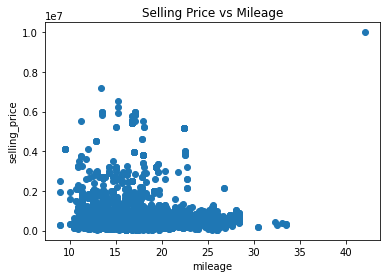

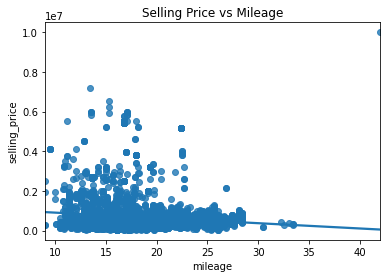

Mileage and Selling Price Correlation:  -0.1288684017959552


In [41]:
#Visualization mileage and selling_price
num_feature_plot(car_pricing_df,'mileage','selling_price','Selling Price vs Mileage')
num_feature_plot_w_line(car_pricing_df,'mileage','selling_price','Selling Price vs Mileage')
#Correlation
print("Mileage and Selling Price Correlation: ",car_pricing_df['selling_price'].corr(car_pricing_df['mileage']))
#Correlation is high we cannot eliminate the feature

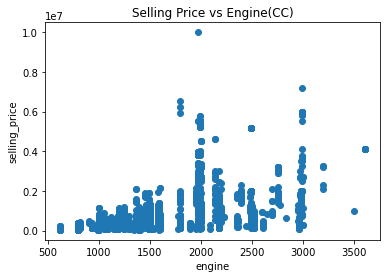

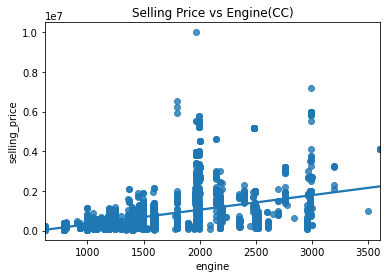

Engine and Selling Price Correlation:  0.45507749924475355


In [42]:
#Visualization engine and selling_price
num_feature_plot(car_pricing_df,'engine','selling_price','Selling Price vs Engine(CC)')
num_feature_plot_w_line(car_pricing_df,'engine','selling_price','Selling Price vs Engine(CC)')
#Correlation
print("Engine and Selling Price Correlation: ",car_pricing_df['selling_price'].corr(car_pricing_df['engine']))
#Correlation is high we cannot eliminate the feature

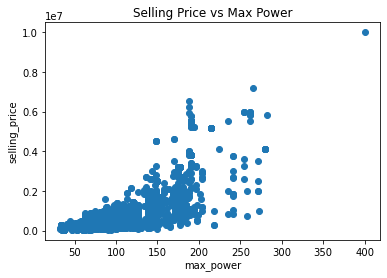

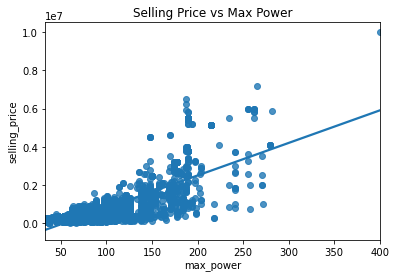

Max power and Selling Price Correlation:  0.7491940742686655


In [43]:
#Visualization max power and selling_price
num_feature_plot(car_pricing_df,'max_power','selling_price','Selling Price vs Max Power')
num_feature_plot_w_line(car_pricing_df,'max_power','selling_price','Selling Price vs Max Power')
#Correlation
print("Max power and Selling Price Correlation: ",car_pricing_df['selling_price'].corr(car_pricing_df['max_power']))
#Correlation is high we cannot eliminate the feature

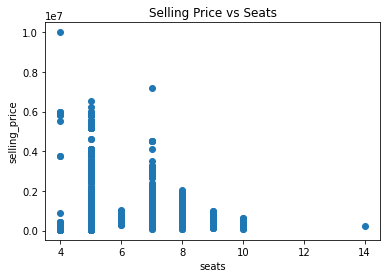

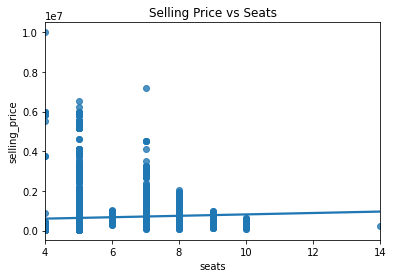

Seats and Selling Price Correlation:  0.04186520612251257


In [44]:
#Visualization seats and selling_price
num_feature_plot(car_pricing_df,'seats','selling_price','Selling Price vs Seats')
num_feature_plot_w_line(car_pricing_df,'seats','selling_price','Selling Price vs Seats')
#Correlation
print("Seats and Selling Price Correlation: ",car_pricing_df['selling_price'].corr(car_pricing_df['seats']))
#Correlation is low we can eliminate the feature

In [45]:
#Before eliminations, see all correlations
car_pricing_df.corr()

,age,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
age,1.000000,-0.412429,0.428775,-0.332461,-0.017213,-0.226545,0.007253,-0.029046,-0.036053,0.060022,...,-0.249926,0.249926,-0.214530,0.243713,-0.100325,-0.491940,0.205951,0.317254,-0.032673,0.271610
selling_price,-0.412429,1.000000,-0.222696,-0.128868,0.455077,0.749194,0.041865,-0.033224,0.203669,-0.036010,...,0.590011,-0.590011,0.401465,-0.385786,0.032850,0.240130,-0.073339,-0.178325,0.116226,-0.116761
km_driven,0.428775,-0.222696,1.000000,-0.178408,0.206225,-0.038567,0.227320,-0.005449,0.271842,0.023094,...,-0.201778,0.201778,-0.178563,0.202738,-0.083252,-0.295572,0.090000,0.210110,-0.024183,0.148358
mileage,-0.332461,-0.128868,-0.178408,1.000000,-0.589440,-0.385095,-0.472785,0.102570,0.057809,-0.014994,...,-0.177127,0.177127,0.008002,0.010331,-0.039054,0.169350,-0.071293,-0.105038,-0.016317,-0.097866
engine,-0.017213,0.455077,0.206225,-0.589440,1.000000,0.704275,0.615543,-0.059932,0.506594,-0.056765,...,0.282050,-0.282050,0.124360,-0.132535,0.038894,-0.015355,-0.005705,0.022073,0.014002,-0.007727
max_power,-0.226545,0.749194,-0.038567,-0.385095,0.704275,1.000000,0.192141,-0.069753,0.303929,-0.060269,...,0.540993,-0.540993,0.296455,-0.285907,0.026528,0.115296,-0.036714,-0.084506,0.049809,-0.056567
seats,0.007253,0.041865,0.227320,-0.472785,0.615543,0.192141,1.000000,-0.038797,0.356174,-0.029117,...,-0.072736,0.072736,-0.074406,0.081652,-0.028461,-0.035158,0.008028,0.033340,-0.010984,0.005189
fuel_CNG,-0.029046,-0.033224,-0.005449,0.102570,-0.059932,-0.069753,-0.038797,1.000000,-0.089002,-0.005438,...,-0.031654,0.031654,-0.032840,0.036830,-0.014304,-0.004326,-0.000536,0.009840,-0.002051,-0.008606
fuel_Diesel,-0.036053,0.203669,0.271842,0.057809,0.506594,0.303929,0.356174,-0.089002,1.000000,-0.072939,...,-0.026552,0.026552,0.065152,0.003831,-0.141075,-0.040522,-0.008193,0.052621,-0.017403,-0.008753
fuel_LPG,0.060022,-0.036010,0.023094,-0.014994,-0.056765,-0.060269,-0.029117,-0.005438,-0.072939,1.000000,...,-0.025941,0.025941,-0.021414,0.025102,-0.011723,-0.024526,0.003998,0.013449,-0.001681,0.021340


In [46]:
#Eliminating seats feature
car_pricing_df.drop(['seats'], axis = 'columns', inplace = True)
car_pricing_df


,age,selling_price,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,6,450000,145500,23.40,1248,74.00,0,1,0,0,0,1,0,1,0,1,0,0,0,0
1,6,370000,120000,21.14,1498,103.52,0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,14,158000,140000,17.70,1497,78.00,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,10,225000,127000,23.00,1396,90.00,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,13,130000,120000,16.10,1298,88.20,0,0,0,1,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,320000,110000,18.50,1197,82.85,0,0,0,1,0,1,0,1,0,1,0,0,0,0
8124,13,135000,119000,16.80,1493,110.00,0,1,0,0,0,1,0,1,0,0,1,0,0,0
8125,11,382000,120000,19.30,1248,73.90,0,1,0,0,0,1,0,1,0,1,0,0,0,0
8126,7,290000,25000,23.57,1396,70.00,0,1,0,0,0,1,0,1,0,1,0,0,0,0


In [47]:
#We prepared data for the model let's check info and descibe
car_pricing_df.info()
car_pricing_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7889 entries, 0 to 8127
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           7889 non-null   int64  
 1   selling_price                 7889 non-null   int64  
 2   km_driven                     7889 non-null   int64  
 3   mileage                       7889 non-null   float64
 4   engine                        7889 non-null   int32  
 5   max_power                     7889 non-null   float64
 6   fuel_CNG                      7889 non-null   uint8  
 7   fuel_Diesel                   7889 non-null   uint8  
 8   fuel_LPG                      7889 non-null   uint8  
 9   fuel_Petrol                   7889 non-null   uint8  
 10  transmission_Automatic        7889 non-null   uint8  
 11  transmission_Manual           7889 non-null   uint8  
 12  seller_type_Dealer            7889 non-null   uint8  
 13  sel

,age,selling_price,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,7889.000000,7.889000e+03,7.889000e+03,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000,7889.000000
mean,6.012169,6.496753e+05,6.919859e+04,19.461709,1458.378628,91.588665,0.006591,0.544175,0.004437,0.444797,0.131195,0.868805,0.139815,0.830270,0.029915,0.659779,0.020155,0.255039,0.000634,0.064393
std,3.863460,8.134766e+05,5.682769e+04,3.938527,503.299977,35.731275,0.080925,0.498076,0.066464,0.496975,0.337635,0.337635,0.346817,0.375419,0.170364,0.473813,0.140538,0.435911,0.025169,0.245468
min,0.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,32.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,6.900000e+05,9.550000e+04,22.320000,1582.000000,102.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,26.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
#Show the correlation in a large scale since we also turned categorical features to one-hot dummpy format
car_pricing_df.corr()

,age,selling_price,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
age,1.000000,-0.412429,0.428775,-0.332461,-0.017213,-0.226545,-0.029046,-0.036053,0.060022,0.032835,-0.249926,0.249926,-0.214530,0.243713,-0.100325,-0.491940,0.205951,0.317254,-0.032673,0.271610
selling_price,-0.412429,1.000000,-0.222696,-0.128868,0.455077,0.749194,-0.033224,0.203669,-0.036010,-0.193894,0.590011,-0.590011,0.401465,-0.385786,0.032850,0.240130,-0.073339,-0.178325,0.116226,-0.116761
km_driven,0.428775,-0.222696,1.000000,-0.178408,0.206225,-0.038567,-0.005449,0.271842,0.023094,-0.274645,-0.201778,0.201778,-0.178563,0.202738,-0.083252,-0.295572,0.090000,0.210110,-0.024183,0.148358
mileage,-0.332461,-0.128868,-0.178408,1.000000,-0.589440,-0.385095,0.102570,0.057809,-0.014994,-0.072634,-0.177127,0.177127,0.008002,0.010331,-0.039054,0.169350,-0.071293,-0.105038,-0.016317,-0.097866
engine,-0.017213,0.455077,0.206225,-0.589440,1.000000,0.704275,-0.059932,0.506594,-0.056765,-0.490367,0.282050,-0.282050,0.124360,-0.132535,0.038894,-0.015355,-0.005705,0.022073,0.014002,-0.007727
max_power,-0.226545,0.749194,-0.038567,-0.385095,0.704275,1.000000,-0.069753,0.303929,-0.060269,-0.285184,0.540993,-0.540993,0.296455,-0.285907,0.026528,0.115296,-0.036714,-0.084506,0.049809,-0.056567
fuel_CNG,-0.029046,-0.033224,-0.005449,0.102570,-0.059932,-0.069753,1.000000,-0.089002,-0.005438,-0.072909,-0.031654,0.031654,-0.032840,0.036830,-0.014304,-0.004326,-0.000536,0.009840,-0.002051,-0.008606
fuel_Diesel,-0.036053,0.203669,0.271842,0.057809,0.506594,0.303929,-0.089002,1.000000,-0.072939,-0.977969,-0.026552,0.026552,0.065152,0.003831,-0.141075,-0.040522,-0.008193,0.052621,-0.017403,-0.008753
fuel_LPG,0.060022,-0.036010,0.023094,-0.014994,-0.056765,-0.060269,-0.005438,-0.072939,1.000000,-0.059751,-0.025941,0.025941,-0.021414,0.025102,-0.011723,-0.024526,0.003998,0.013449,-0.001681,0.021340
fuel_Petrol,0.032835,-0.193894,-0.274645,-0.072634,-0.490367,-0.285184,-0.072909,-0.977969,-0.059751,1.000000,0.035235,-0.035235,-0.057085,-0.013194,0.145284,0.044596,0.007764,-0.056138,0.018000,0.007320


<AxesSubplot:>

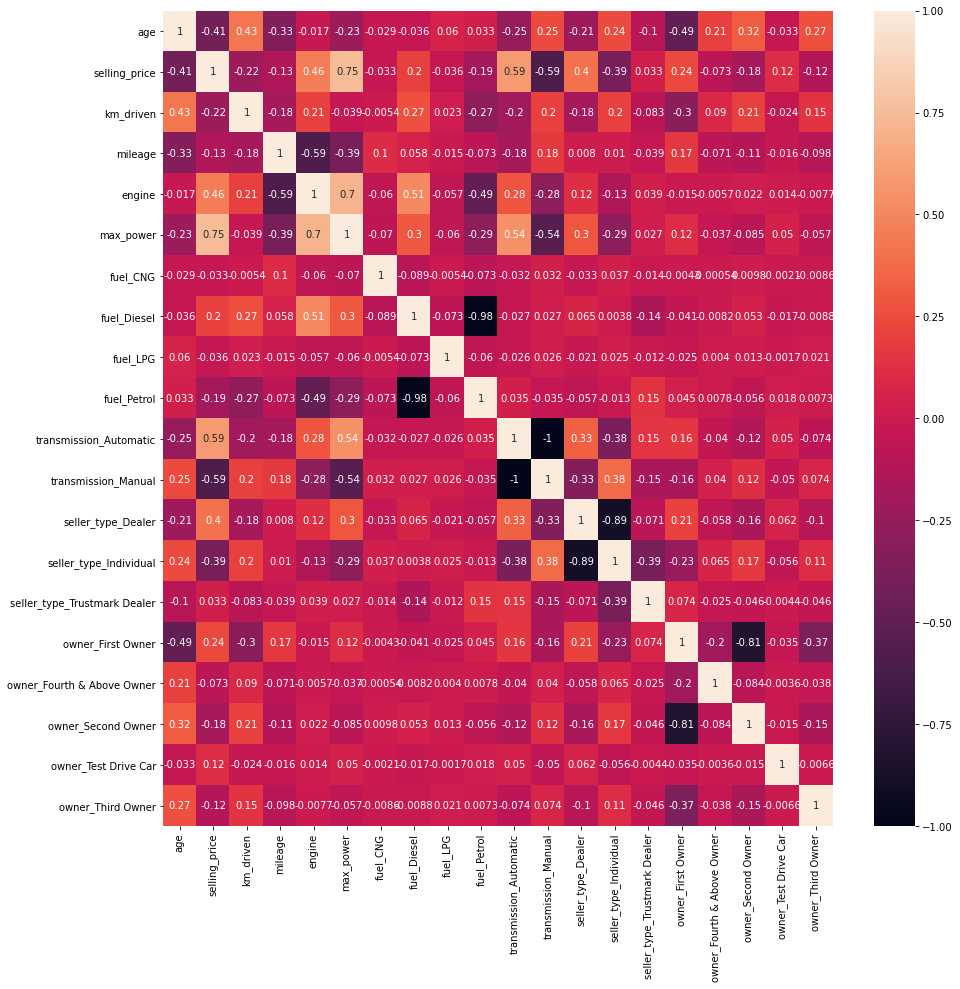

In [49]:
#I also decide to plot heatmap for better visualization using seaborn 
plt.figure(figsize=[15,15])
sns.heatmap(car_pricing_df.corr(),annot=True) # annot is for putting exact correlation ratios 

In [50]:
#From now on we can do Linear regression
#We will pick at least 4 different features in 3 different models


In [51]:
###########  1st Model ###########

#For the first set we will split our dependent variables with selected independent feature variables
#1st feature set
feature_set1 = car_pricing_df.loc[:,['age','engine','max_power','transmission_Automatic','transmission_Manual']].values
#Note: Since transmission is one-hot dummy format we include transmission_Automatic and transmission_Manual together

dependent = car_pricing_df.loc[:,'selling_price'].values



In [52]:
#Splitting data for train and test
feature_set1_train, feature_set1_test, dependent_train1, dependent_test1 = train_test_split(feature_set1, dependent, train_size = 0.9,test_size=0.1, random_state = 147)

In [53]:
#Printing the number of instances in training and test set
print(feature_set1_train.shape)
print(feature_set1_test.shape)


(7100, 5)
(789, 5)


In [54]:
#We initialize min-max scaler and transform each feature with min-max scaler in train set
#We need to put the feature values to a certain range (0, 1) in order to stabilize the model
#(Feature set values are so varying thats why we scale)
scaler = MinMaxScaler(feature_range=(0, 1))
feature_set1_train = scaler.fit_transform(feature_set1_train)
feature_set1_train

array([[0.46153846, 0.52181208, 0.28676471, 0.        , 1.        ],
       [0.07692308, 0.15503356, 0.09586057, 0.        , 1.        ],
       [0.42307692, 0.2590604 , 0.05446623, 0.        , 1.        ],
       ...,
       [0.11538462, 0.29328859, 0.17728758, 0.        , 1.        ],
       [0.38461538, 0.12550336, 0.09068627, 0.        , 1.        ],
       [0.30769231, 0.52181208, 0.23747277, 0.        , 1.        ]])

In [55]:
#1st Model Initialization
model1 = LinearRegression()

In [56]:
#Now we should fit the traning data to the model
model1.fit(feature_set1_train,dependent_train1)
#Printing model coefficents
model1.coef_

array([-1202306.82063665,  -182838.76720636,  5090896.64100567,
         261546.8236441 ,  -261546.8236441 ])

In [57]:
#Printing the formula of model
_str = "y = "
for i, m in enumerate(model1.coef_):
    _str += "x_{}*{}+".format(i+1, m)
_str += str(model1.intercept_)
print(_str)

y = x_1*-1202306.8206366545+x_2*-182838.76720636303+x_3*5090896.641005673+x_4*261546.8236441045+x_5*-261546.82364410404+357416.20153792517


In [58]:
#We scale the test features in range(0,1)
feature_set1_test = scaler.transform(feature_set1_test)
feature_set1_test

array([[0.15384615, 0.16644295, 0.10130719, 0.        , 1.        ],
       [0.5       , 0.05771812, 0.03676471, 0.        , 1.        ],
       [0.07692308, 0.1885906 , 0.11211874, 0.        , 1.        ],
       ...,
       [0.07692308, 0.29328859, 0.17916667, 0.        , 1.        ],
       [0.61538462, 0.05771812, 0.01143791, 0.        , 1.        ],
       [0.23076923, 0.62583893, 0.16938998, 0.        , 1.        ]])

In [59]:
#We predict the dependent feature values using test data and model
dependent_predict1 = model1.predict(feature_set1_test)


In [60]:
# Print the predicted and the actual value in test set
def print_predict_vs_actual(n,predicted,test):
    for i in range(0,n):
        print("Predicted: {}, Actual: {}".format(predicted[i], test[i]))
print_predict_vs_actual(4,dependent_predict1, dependent_test1)


Predicted: 396211.3044070416, Actual: 380000
Predicted: -328671.8247939957, Actual: 100000
Predicted: 539687.4627461429, Actual: 550000
Predicted: 807344.1946730539, Actual: 450000


In [61]:
# Calculate the R2 score of the model in test data
#score = model1.score(feature_set1_test, dependent_test1)
#print("R2 Score: ",score)
#or

R2_score_model1 = r2_score(dependent_test1,dependent_predict1) 
print("R2 Score: ",R2_score_model1)

R2 Score:  0.6650147550970581


In [62]:
# Calculate mean squared error of predicted values
mse_model1 = mean_squared_error(dependent_test1, dependent_predict1)
print("Mean Squared Error: ",mse_model1)


Mean Squared Error:  214867387061.22934


In [63]:
# Calculate absolute squared error of predicted values
mae_model1 = mean_absolute_error(dependent_test1, dependent_predict1)
print("Mean Absolute Error: ", mae_model1)

Mean Absolute Error:  269140.9217198042


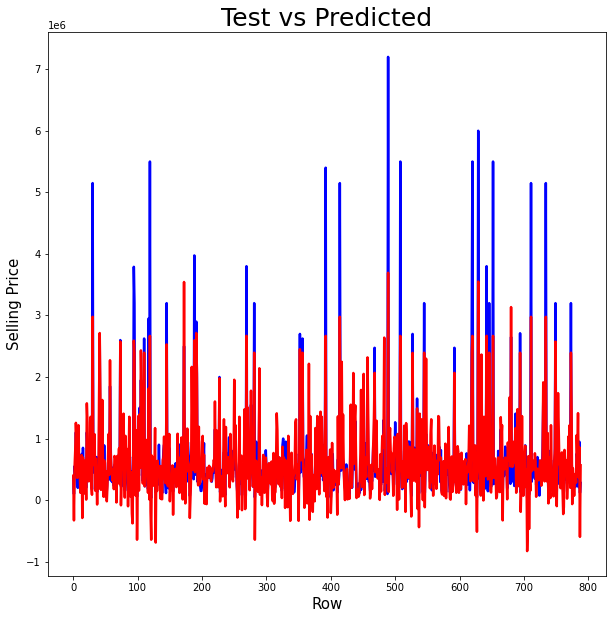

In [64]:
#Now Let's visualize our actual and predicted selling price values
#In order to do thar 1st i need a index list of rows
index_list_model1 = [i for i in range(len(dependent_test1))]
#len(index_list_model1)
#len(dependent_test1)
plt.figure(figsize = (10,10))
plt.plot(index_list_model1,dependent_test1, color="blue", linewidth=2.5)
plt.plot(index_list_model1,dependent_predict1, color="red", linewidth=2.5)
plt.title('Test vs Predicted',fontsize = 25)
plt.xlabel('Row',fontsize = 15)
plt.ylabel('Selling Price', fontsize = 15)
plt.show()

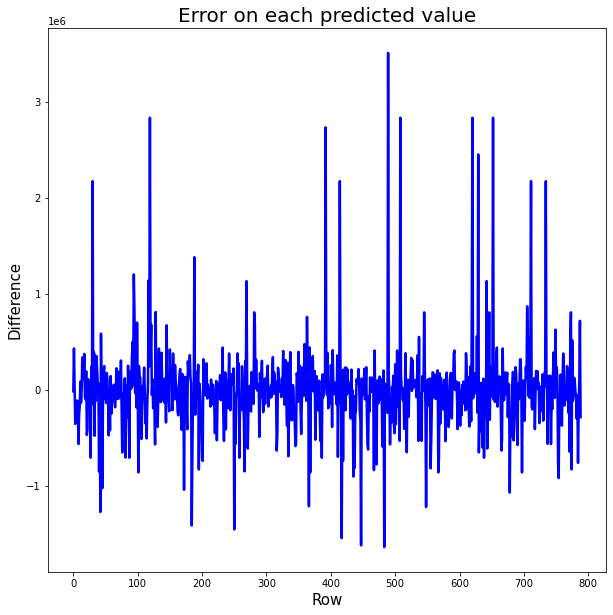

In [65]:
#Now let's plot difference(error) of each predicted value vs test value
#for this again i need a list of indexes

plt.figure(figsize = (10,10))
plt.plot(index_list_model1,dependent_test1- dependent_predict1, color="blue", linewidth=2.5)
plt.title('Error on each predicted value',fontsize = 20)
plt.xlabel('Row',fontsize = 15)
plt.ylabel('Difference', fontsize = 15)
plt.show()

Text(0, 0.5, 'Predict')

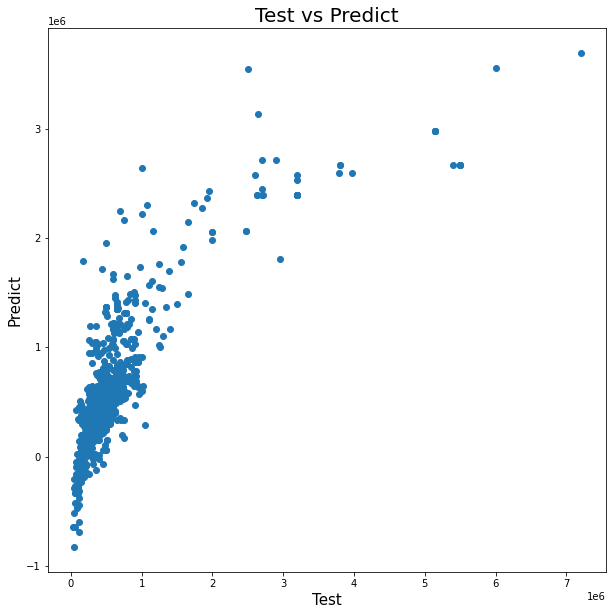

In [66]:
#Scatter plot of predict and test data
plt.figure(figsize = (10,10))
plt.scatter(dependent_test1,dependent_predict1)
plt.title('Test vs Predict', fontsize=20)               
plt.xlabel('Test', fontsize=15)                          
plt.ylabel('Predict', fontsize=15)     

In [67]:
###########  2nd Model ###########

#2nd Feature set
feature_set2 = car_pricing_df.loc[:,['km_driven','engine','transmission_Automatic','transmission_Manual','seller_type_Dealer','seller_type_Individual','seller_type_Trustmark Dealer']].values



#We already defined the dependent variable, no need to define again

### 

In [68]:
#Splitting data for train and test
feature_set2_train, feature_set2_test, dependent_train2, dependent_test2 = train_test_split(feature_set2, dependent, train_size = 0.9,test_size=0.1, random_state = 147)

In [69]:
#Printing the number of instances in training and test set
print(feature_set2_train.shape)
print(feature_set2_test.shape)

(7100, 7)
(789, 7)


In [70]:
#Scale traning set
#scaler is already defined
feature_set2_train = scaler.fit_transform(feature_set2_train)
feature_set2_train

array([[0.07589593, 0.52181208, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00296511, 0.15503356, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05083721, 0.2590604 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.04363521, 0.29328859, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02118192, 0.12550336, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0381278 , 0.52181208, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [71]:
#Model 2 Initialization
model2 = LinearRegression()

In [72]:
#Fit the traning data to the model
model2.fit(feature_set2_train,dependent_train2)
#Printing model coefficents
model2.coef_

array([-6200939.58967029,  1750494.74593622,   476654.74586093,
        -476654.74586093,   361465.68737157,   -76074.89188713,
        -285390.79548444])

In [73]:
#Printing the formula of model
_str = "y = "
for i, m in enumerate(model2.coef_):
    _str += "x_{}*{}+".format(i+1, m)
_str += str(model2.intercept_)
print(_str)

y = x_1*-6200939.589670291+x_2*1750494.7459362175+x_3*476654.745860929+x_4*-476654.74586092896+x_5*361465.68737156957+x_6*-76074.89188712866+x_7*-285390.79548444075+714603.1745419691


In [74]:
#Scale the test features in range(0,1)
feature_set2_test = scaler.transform(feature_set2_test)
feature_set2_test

array([[0.0381278 , 0.16644295, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02965486, 0.05771812, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02118192, 0.1885906 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01170071, 0.29328859, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.03389133, 0.05771812, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04236427, 0.62583893, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [75]:
#Predict the dependent feature values using test data and model
dependent_predict2 = model2.predict(feature_set2_test)


In [76]:
# Print the predicted and the actual value in test set
print_predict_vs_actual(4,dependent_predict2, dependent_test2)


Predicted: 216802.85203183518, Actual: 380000
Predicted: 79020.78816067288, Actual: 100000
Predicted: 360652.5661010742, Actual: 550000
Predicted: 464528.15165988536, Actual: 450000


In [77]:
# Calculate the R2 score of the model in test data
#score = model1.score(feature_set1_test, dependent_test1)
#print("R2 Score: ",score)
#or

R2_score_model2 = r2_score(dependent_test2,dependent_predict2) 
print("R2 Score: ",R2_score_model2)

R2 Score:  0.5252091113290759


In [78]:
# Calculate mean squared error of predicted values
mse_model2 = mean_squared_error(dependent_test2, dependent_predict2)
print("Mean Squared Error: ",mse_model2)# Calculate mean squared error of predicted values


Mean Squared Error:  304542003570.21326


In [79]:
# Calculate absolute squared error of predicted values
mae_model2 = mean_absolute_error(dependent_test2, dependent_predict2)
print("Mean Absolute Error: ", mae_model2)

Mean Absolute Error:  314121.86888418405


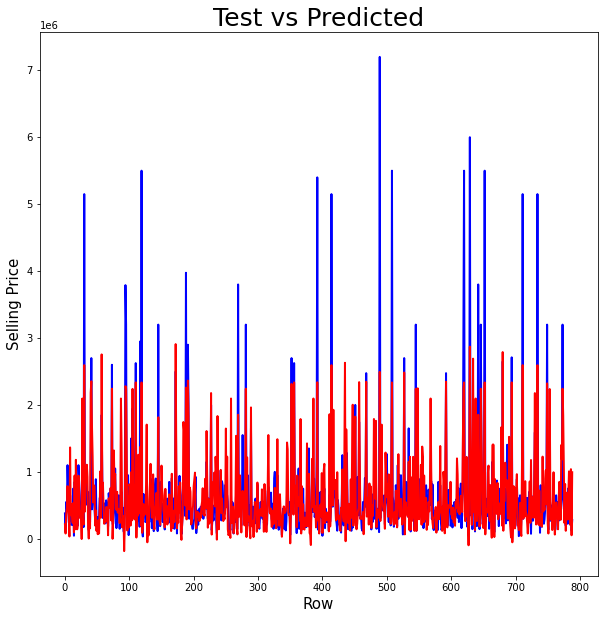

In [80]:
#Visualize our actual and predicted selling price values
#In order to do thar 1st i need a index list of rows

index_list_model2 = [i for i in range(len(dependent_test2))]

plt.figure(figsize = (10,10))
plt.plot(index_list_model2,dependent_test2, color="blue", linewidth=2.0)
plt.plot(index_list_model2,dependent_predict2, color="red", linewidth=2.0)
plt.title('Test vs Predicted',fontsize = 25)
plt.xlabel('Row',fontsize = 15)
plt.ylabel('Selling Price', fontsize = 15)
plt.show()

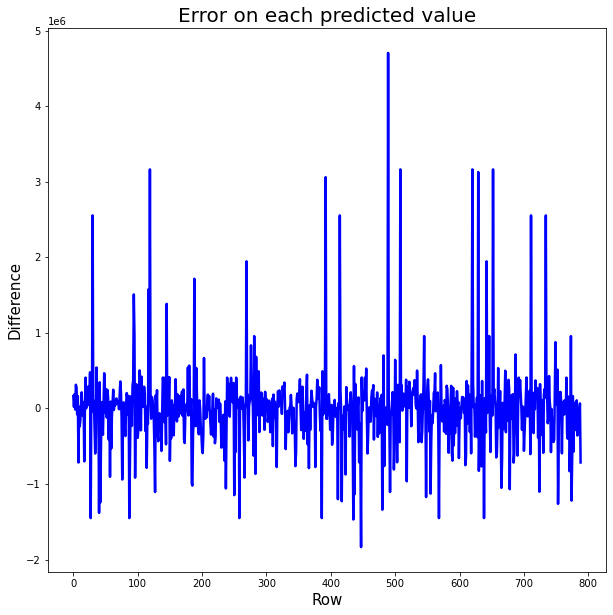

In [81]:
#Plot difference(error) of each predicted value vs test value

plt.figure(figsize = (10,10))
plt.plot(index_list_model2,dependent_test2 - dependent_predict2, color="blue", linewidth=2.5)
plt.title('Error on each predicted value',fontsize = 20)
plt.xlabel('Row',fontsize = 15)
plt.ylabel('Difference', fontsize = 15)
plt.show()

Text(0, 0.5, 'Predict')

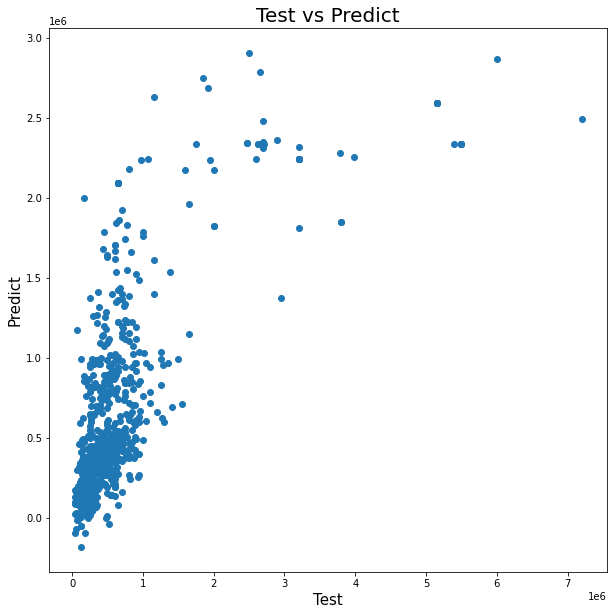

In [82]:
#Scatter plot of predict and test data
#These scatter plots for understanding the spread is only for notebook above two plots are enough for visualization
plt.figure(figsize = (10,10))
plt.scatter(dependent_test2,dependent_predict2)
plt.title('Test vs Predict', fontsize=20)               
plt.xlabel('Test', fontsize=15)                          
plt.ylabel('Predict', fontsize=15)     

In [83]:
###########  3rd Model ###########

#3rd Feature set
feature_set3 = car_pricing_df.loc[:,['age','km_driven','engine','max_power','transmission_Automatic','transmission_Manual','seller_type_Dealer','seller_type_Individual','seller_type_Trustmark Dealer']].values


In [84]:
#Splitting data for train and test
feature_set3_train, feature_set3_test, dependent_train3, dependent_test3 = train_test_split(feature_set3, dependent,train_size = 0.9, test_size=0.1, random_state = 147)

In [85]:
#Printing the number of instances in training and test set
print(feature_set3_train.shape)
print(feature_set3_test.shape)
feature_set3_test

(7100, 9)
(789, 9)


array([[4.000e+00, 9.000e+04, 1.120e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.300e+01, 7.000e+04, 7.960e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 5.000e+04, 1.186e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.000e+00, 2.762e+04, 1.498e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.600e+01, 8.000e+04, 7.960e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+00, 1.000e+05, 2.489e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [86]:
#Scale traning set
#scaler is already defined
feature_set3_train = scaler.fit_transform(feature_set3_train)
feature_set3_train

array([[0.46153846, 0.07589593, 0.52181208, ..., 0.        , 1.        ,
        0.        ],
       [0.07692308, 0.00296511, 0.15503356, ..., 1.        , 0.        ,
        0.        ],
       [0.42307692, 0.05083721, 0.2590604 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11538462, 0.04363521, 0.29328859, ..., 1.        , 0.        ,
        0.        ],
       [0.38461538, 0.02118192, 0.12550336, ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.0381278 , 0.52181208, ..., 0.        , 1.        ,
        0.        ]])

In [87]:
#Model 3 Initialization
model3 = LinearRegression()

In [88]:
#Fit the traning data to the model
model3.fit(feature_set3_train,dependent_train3)
#Printing model coefficents
model3.coef_

array([-1013449.33117116, -2126187.08681616,   -16133.99105342,
        4788850.24409201,   227102.00555479,  -227102.00555479,
         223068.82223314,   -50216.95423182,  -172851.86800132])

In [89]:
#Printing the formulaof the model
_str = "y = "
for i, m in enumerate(model3.coef_):
    _str += "x_{}*{}+".format(i+1, m)
_str += str(model3.intercept_)
print(_str)

y = x_1*-1013449.3311711623+x_2*-2126187.0868161595+x_3*-16133.991053422156+x_4*4788850.244092014+x_5*227102.0055547926+x_6*-227102.00555478915+x_7*223068.82223314384+x_8*-50216.95423181967+x_9*-172851.86800132156+367931.34886725585


In [90]:
#Scale the test features in range(0,1)
feature_set3_test = scaler.transform(feature_set3_test)
feature_set3_test

array([[0.15384615, 0.0381278 , 0.16644295, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.02965486, 0.05771812, ..., 0.        , 1.        ,
        0.        ],
       [0.07692308, 0.02118192, 0.1885906 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.07692308, 0.01170071, 0.29328859, ..., 1.        , 0.        ,
        0.        ],
       [0.61538462, 0.03389133, 0.05771812, ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.04236427, 0.62583893, ..., 0.        , 1.        ,
        0.        ]])

In [91]:
#Predict the dependent feature values using test data and model
dependent_predict3 = model3.predict(feature_set3_test)


In [92]:
# Print the predicted and the actual value in test set
print_predict_vs_actual(4,dependent_predict3, dependent_test3)

Predicted: 336089.83645197656, Actual: 380000
Predicted: -304034.6168156072, Actual: 100000
Predicted: 501495.1335549192, Actual: 550000
Predicted: 774155.6448520507, Actual: 450000


In [93]:
# Calculate the R2 score of the model in test data
R2_score_model3 = r2_score(dependent_test3,dependent_predict3) 
print("R2 Score: ",R2_score_model3)


R2 Score:  0.6802130653249487


In [94]:
# Calculate mean squared error of predicted values
mse_model3 = mean_squared_error(dependent_test3, dependent_predict3)
print("Mean Squared Error: ",mse_model3)# Calculate mean squared error of predicted values

Mean Squared Error:  205118834681.38055


In [95]:
# Calculate absolute squared error of predicted values
mae_model3 = mean_absolute_error(dependent_test3, dependent_predict3)
print("Mean Absolute Error: ", mae_model3)

Mean Absolute Error:  270755.2724451929


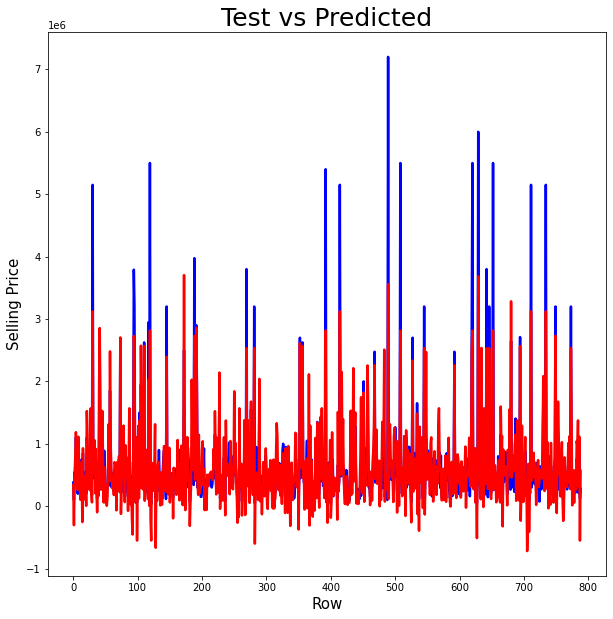

In [96]:
#Visualize our actual and predicted selling price values
#In order to do thar 1st i need a index list of rows
index_list_model3 = [i for i in range(len(dependent_test3))]

plt.figure(figsize = (10,10))
plt.plot(index_list_model3,dependent_test3, color="blue", linewidth=2.5)
plt.plot(index_list_model3,dependent_predict3, color="red", linewidth=2.5)
plt.title('Test vs Predicted',fontsize = 25)
plt.xlabel('Row',fontsize = 15)
plt.ylabel('Selling Price', fontsize = 15)
plt.show()

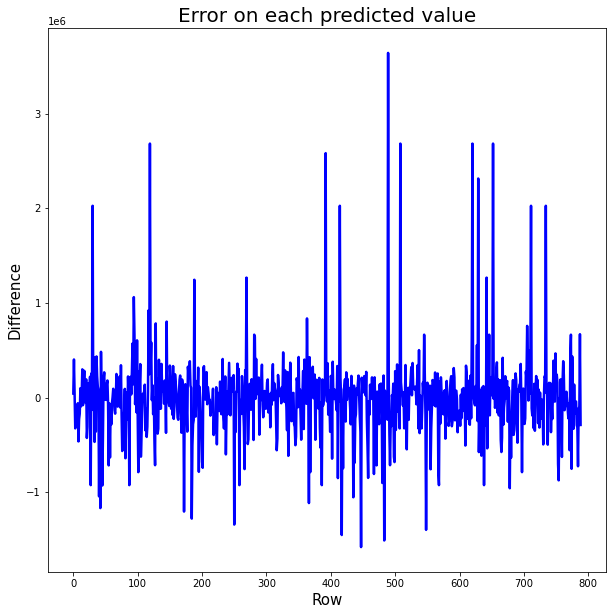

In [97]:
#Plot difference(error) of each predicted value vs test value

plt.figure(figsize = (10,10))
plt.plot(index_list_model3,dependent_test3 - dependent_predict3, color="blue", linewidth=2.5)
plt.title('Error on each predicted value',fontsize = 20)
plt.xlabel('Row',fontsize = 15)
plt.ylabel('Difference', fontsize = 15)
plt.show()


Text(0, 0.5, 'Predict')

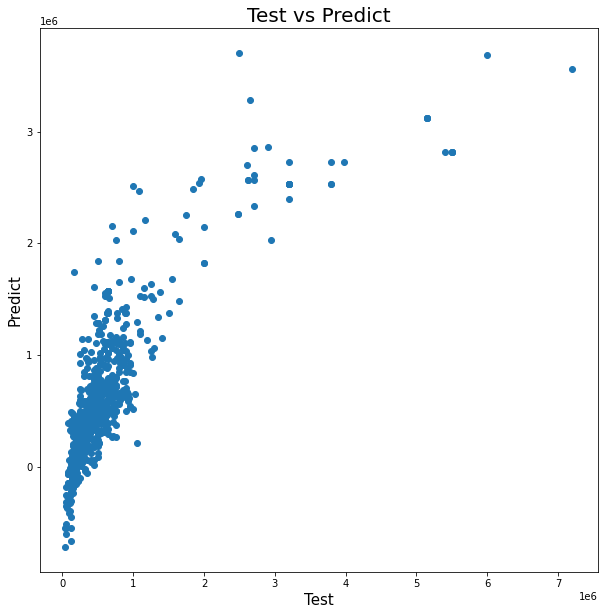

In [98]:
#Scatter plot of predict and test data
plt.figure(figsize = (10,10))
plt.scatter(dependent_test3,dependent_predict3)
plt.title('Test vs Predict', fontsize=20)               
plt.xlabel('Test', fontsize=15)                          
plt.ylabel('Predict', fontsize=15)     

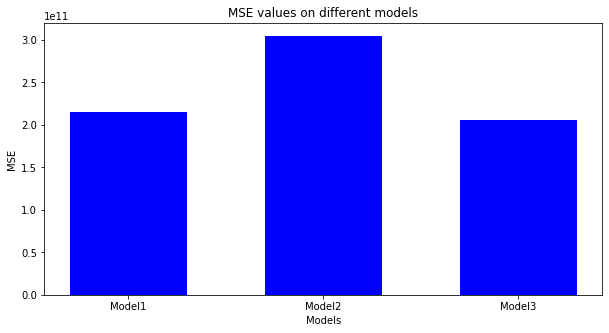

MSE of model1 : 214867387061.22934
MSE of model2 : 304542003570.21326
MSE of model3: 205118834681.38055


In [99]:
#Comparison of MSE values of 3 models
mse = {'Model1':mse_model1, 'Model2':mse_model2, 'Model3':mse_model3} 
key = list(mse.keys()) 
values = list(mse.values()) 
   
plt.figure(figsize = (10, 5)) 
plt.bar(key, values, color ='b',  width = 0.6) 
  
plt.xlabel("Models") 
plt.ylabel("MSE") 
plt.title("MSE values on different models") 
plt.show() 

print("MSE of model1 :", mse_model1)
print("MSE of model2 :", mse_model2)
print("MSE of model3:", mse_model3)

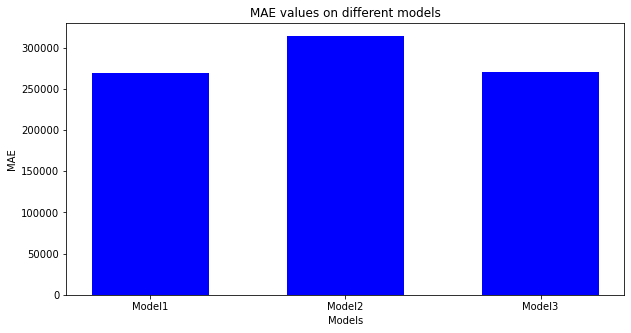

MAE of model1 : 269140.9217198042
MAE of model2 : 314121.86888418405
MAE of model3: 270755.2724451929


In [100]:
#Comparison of MAE values of 3 models
mae = {'Model1':mae_model1, 'Model2':mae_model2, 'Model3':mae_model3} 
key = list(mae.keys()) 
values = list(mae.values()) 
   
plt.figure(figsize = (10, 5)) 
plt.bar(key, values, color ='b',  width = 0.6) 
  
plt.xlabel("Models") 
plt.ylabel("MAE") 
plt.title("MAE values on different models") 
plt.show() 

print("MAE of model1 :", mae_model1)
print("MAE of model2 :", mae_model2)
print("MAE of model3:", mae_model3)

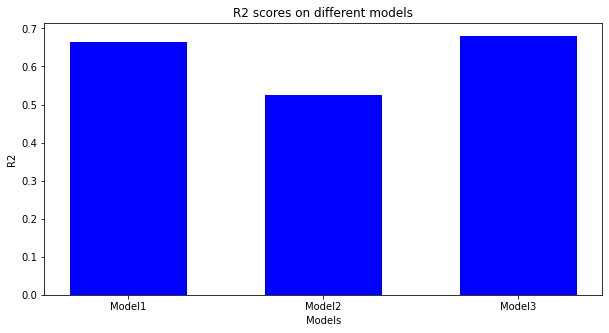

R2 score of model1 : 0.6650147550970581
R2 score of model2 : 0.5252091113290759
R2 score of model3: 0.6802130653249487


In [101]:
#Comparison of R2 scores of 3 models
r2 = {'Model1':R2_score_model1, 'Model2':R2_score_model2, 'Model3':R2_score_model3} 
key = list(r2.keys()) 
values = list(r2.values()) 
   
plt.figure(figsize = (10, 5)) 
plt.bar(key, values, color ='b',  width = 0.6) 
  
plt.xlabel("Models") 
plt.ylabel("R2") 
plt.title("R2 scores on different models") 
plt.show() 

print("R2 score of model1 :", R2_score_model1)
print("R2 score of model2 :", R2_score_model2)
print("R2 score of model3:", R2_score_model3)

In [102]:
#Printing the formula of best performing model
_str = "y = "
for i, m in enumerate(model3.coef_):
    _str += "x_{}*{}+".format(i+1, m)
_str += str(model3.intercept_)
print(_str)

y = x_1*-1013449.3311711623+x_2*-2126187.0868161595+x_3*-16133.991053422156+x_4*4788850.244092014+x_5*227102.0055547926+x_6*-227102.00555478915+x_7*223068.82223314384+x_8*-50216.95423181967+x_9*-172851.86800132156+367931.34886725585


In [103]:
#Gettling model coefficients together
coef_dic = {'model1_coef':model1.coef_, 'model2_coef':model2.coef_,'model3_coef': model3.coef_}
coef_dic

{'model1_coef': array([-1202306.82063665,  -182838.76720636,  5090896.64100567,
          261546.8236441 ,  -261546.8236441 ]),
 'model2_coef': array([-6200939.58967029,  1750494.74593622,   476654.74586093,
         -476654.74586093,   361465.68737157,   -76074.89188713,
         -285390.79548444]),
 'model3_coef': array([-1013449.33117116, -2126187.08681616,   -16133.99105342,
         4788850.24409201,   227102.00555479,  -227102.00555479,
          223068.82223314,   -50216.95423182,  -172851.86800132])}

In [104]:
#Showing correlations
coef_df = pd.DataFrame.from_dict(coef_dic, orient='index')
coef_df

,0,1,2,3,4,5,6,7,8
model1_coef,-1.202307e+06,-1.828388e+05,5.090897e+06,2.615468e+05,-261546.823644,NaN,NaN,NaN,NaN
model2_coef,-6.200940e+06,1.750495e+06,4.766547e+05,-4.766547e+05,361465.687372,-76074.891887,-285390.795484,NaN,NaN
model3_coef,-1.013449e+06,-2.126187e+06,-1.613399e+04,4.788850e+06,227102.005555,-227102.005555,223068.822233,-50216.954232,-172851.868001


In [105]:
age_filter = car_pricing_df['age'] > 20
car_pricing_df[age_filter]

,age,selling_price,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
177,21,40000,40000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
999,21,55000,60000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1468,21,52000,100000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
1474,26,45000,60000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
2327,22,80000,70000,14.0,796,35.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
2340,21,50000,60000,17.3,993,60.0,0,0,0,1,0,1,0,1,0,0,1,0,0,0
2424,23,60000,25000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3046,22,45000,80000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,0,1,0,0,0
3890,25,55000,70000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
4108,24,40000,32000,16.1,796,37.0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
